In [30]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
X = joblib.load("../models/X_features_scaled.pkl")
y = joblib.load("../models/y_class.pkl")
print("Feature matrix shape:", X.shape)
print("Class distribution:")
print(y.value_counts())

Feature matrix shape: (4112, 5027)
Class distribution:
problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64


In [32]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Encoded classes:", le.classes_)

Encoded classes: ['easy' 'hard' 'medium']


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,        # use encoded labels consistently
    test_size=0.5,
    random_state=59,
    stratify=y_encoded
)

In [34]:
clf = LogisticRegression(
    solver="lbfgs",
    max_iter=10000,
    class_weight="balanced"
)
clf.fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(
    classification_report(
        y_test,
        y_pred_lr,
        labels=[0, 1, 2],
        target_names=le.classes_,
        zero_division=0
    )
)

Logistic Regression Accuracy: 0.47470817120622566
              precision    recall  f1-score   support

        easy       0.42      0.31      0.36       383
        hard       0.56      0.62      0.58       970
      medium       0.37      0.37      0.37       703

    accuracy                           0.47      2056
   macro avg       0.45      0.43      0.44      2056
weighted avg       0.47      0.47      0.47      2056



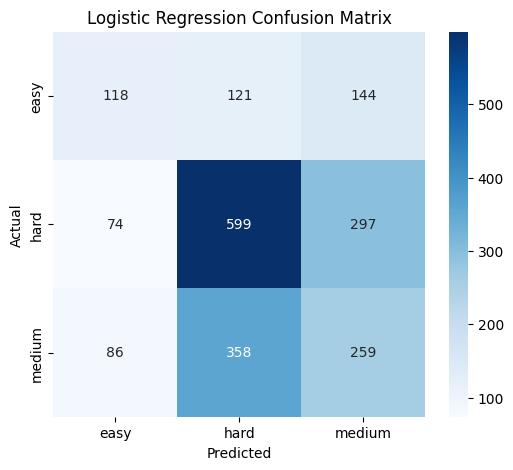

In [35]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [36]:
svm = LinearSVC(
    class_weight="balanced",
    max_iter=3000
)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(
    classification_report(
        y_test,
        y_pred_svm,
        labels=[0, 1, 2],
        target_names=le.classes_,
        zero_division=0
    )
)

SVM Accuracy: 0.46108949416342415
              precision    recall  f1-score   support

        easy       0.36      0.30      0.32       383
        hard       0.55      0.59      0.57       970
      medium       0.37      0.37      0.37       703

    accuracy                           0.46      2056
   macro avg       0.43      0.42      0.42      2056
weighted avg       0.45      0.46      0.46      2056



c:\Users\parsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1258: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


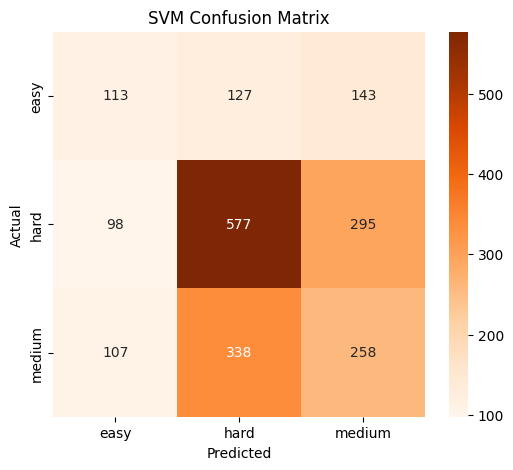

In [37]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="Oranges",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [38]:
joblib.dump(svm, "../models/classifier_svm.pkl")
joblib.dump(clf, "../models/classifier_logreg.pkl")
joblib.dump(le, "../models/label_encoder.pkl")

['../models/label_encoder.pkl']

The results show that both Logistic Regression and Linear SVM are effective at identifying
easy and hard problems, while the medium difficulty class exhibits significant overlap with
the other two classes. This reflects the inherent ambiguity of medium difficulty problems
in natural language descriptions, a known limitation in difficulty prediction tasks.
While overall accuracy is moderate, class-wise recall and confusion matrices provide
more meaningful insights than accuracy alone for this task.
